In [7]:
# Importing the libraries

%matplotlib inline
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.cross_validation import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
from sklearn.metrics import confusion_matrix,accuracy_score
from sklearn.grid_search import GridSearchCV

/srv/conda/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
/srv/conda/lib/python3.6/site-packages/sklearn/ensemble/weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d
/srv/conda/lib/python3.6/site-packages/sklearn/grid_search.py:42: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. This module will be removed in 0.20.
  DeprecationWarning)


In [2]:
#Load Loan Payments data File

loan_df = pd.read_csv('Loan payments data.csv')
print(loan_df.columns)

Index(['Loan_ID', 'loan_status', 'Principal', 'terms', 'effective_date',
       'due_date', 'paid_off_time', 'past_due_days', 'age', 'education',
       'Gender'],
      dtype='object')


In [50]:
df1=loan_df[['loan_status','age', 'education','Gender','Principal','terms','past_due_days']]

df1['education'].replace('High School or Below',1,inplace=True)
df1['education'].replace('college',2,inplace=True)
df1['education'].replace('Bechalor',3,inplace=True)
df1['education'].replace('Master or Above',4,inplace=True)

df1['Gender'].replace('male',1,inplace=True)
df1['Gender'].replace('female',2,inplace=True)

df1['past_due_days'].replace(np.nan,0,inplace=True)

# Trying to give weightage to higher qualification & Age ; Assuming a person who is 50+ and a Master degree
# has higher chance of earning better and repaying the loan

df1['Age_range'] = df1['age'] / 10
df1['new_feat'] = df1['Age_range'] * df1['education']

df1.head()

/srv/conda/lib/python3.6/site-packages/ipykernel_launcher.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()
/srv/conda/lib/python3.6/site-packages/ipykernel_launcher.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


,loan_status,age,education,Gender,Principal,terms,past_due_days,Age_range,new_feat
0,PAIDOFF,45,1,1,1000,30,0.0,4.5,4.5
1,PAIDOFF,50,3,2,1000,30,0.0,5.0,15.0
2,PAIDOFF,33,3,2,1000,30,0.0,3.3,9.9
3,PAIDOFF,27,2,1,1000,15,0.0,2.7,5.4
4,PAIDOFF,28,2,2,1000,30,0.0,2.8,5.6


In [51]:
# For X , Whenever past_due_days is taken, the accuracy is 95% or greater
#X = df1[['new_feat','Gender']]
X = df1[['new_feat','past_due_days']]
y = df1['loan_status']

In [52]:
#  classify train & test 70:30
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)


In [53]:
# LogisticRegression
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression()
classifier.fit(X_train, y_train)

y_pred = classifier.predict(X_test)

In [54]:
# Summary of the predictions made by the classifier
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
from sklearn.metrics import accuracy_score
print('accuracy is',accuracy_score(y_pred,y_test))


                    precision    recall  f1-score   support

        COLLECTION       0.91      0.97      0.94        31
COLLECTION_PAIDOFF       0.96      0.84      0.90        32
           PAIDOFF       0.98      1.00      0.99        87

       avg / total       0.96      0.96      0.96       150

[[30  1  0]
 [ 3 27  2]
 [ 0  0 87]]
accuracy is 0.96


In [43]:
# Model using Decision Tree

#X = df1[['age','education','past_due_days']]

X = df1[['new_feat','past_due_days','age','Gender']]
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.30,random_state=1)

In [65]:
#{'criterion': 'gini', 'max_depth': 3, 'max_leaf_nodes': 20}

#dt=DecisionTreeClassifier(criterion="entropy")

dt=DecisionTreeClassifier(criterion="gini",max_depth=3,max_leaf_nodes=20)
dt_model=dt.fit(x_train,y_train)

In [66]:
dt_model.feature_importances_
list(zip(X,dt_model.feature_importances_))

[('new_feat', 0.0), ('past_due_days', 1.0)]

In [67]:
#from sklearn import tree
#with open("iris.dot", 'w') as f:
#    f = tree.export_graphviz(dt_model, out_file=f, feature_names=X)

dt_prd=dt_model.predict(x_test)
print(accuracy_score(y_test,dt_prd))
df_confusion = confusion_matrix(y_test,dt_prd)
df_confusion

0.96


array([[33,  2,  0],
       [ 4, 31,  0],
       [ 0,  0, 80]])

/srv/conda/lib/python3.6/site-packages/matplotlib/font_manager.py:1320: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
/srv/conda/lib/python3.6/site-packages/matplotlib/font_manager.py:1320: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
/srv/conda/lib/python3.6/site-packages/matplotlib/font_manager.py:1320: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
/srv/conda/lib/python3.6/site-packages/matplotlib/font_manager.py:1320: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
/srv/conda/lib/python3.6/site-packages/matplotlib/font_manager.py:1320: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to

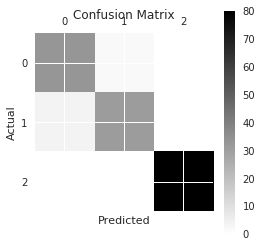

In [68]:
import matplotlib.pyplot as plt
%matplotlib inline
def plot_confusion_matrix(df_confusion, title='Confusion matrix', cmap=plt.cm.gray_r):
    plt.matshow(df_confusion, cmap=cmap) # imshow
    plt.title('Confusion Matrix')
    plt.colorbar()
    plt.ylabel('Actual')
    plt.xlabel('Predicted')

plot_confusion_matrix(df_confusion)

In [57]:
# Model with Random Forest

x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.30,random_state=1)

rf_clf=RandomForestClassifier(max_depth = 10, min_samples_split=2, n_estimators = 10, random_state = 123)
rf_model=rf_clf.fit(x_train,y_train)
rf_prediction=rf_model.predict(x_test)

In [58]:
print(accuracy_score(y_test,rf_prediction))

0.9533333333333334


In [59]:
print(confusion_matrix(y_test,rf_prediction))

[[34  1  0]
 [ 6 29  0]
 [ 0  0 80]]


In [60]:
# trying GridsearchCV to find best parameters in Decision tree

dt_parameters={"criterion":['gini','entropy'],"max_depth":[3,7],"max_leaf_nodes": [20,30]}

In [61]:
grid_dt_clf=GridSearchCV(DecisionTreeClassifier(),dt_parameters)

In [63]:
grid_dt_model=grid_dt_clf.fit(x_train,y_train)
grid_dt_model.best_params_

{'criterion': 'gini', 'max_depth': 3, 'max_leaf_nodes': 20}